

$$\partial_t \begin{pmatrix} \delta S_x \\ \delta S_y \\ \delta S_z \end{pmatrix}
=
\begin{pmatrix} 
-\Gamma - R_{op} & \gamma B_0 \cos(\theta) + \gamma B_{rf} \cos(\omega_{rf} t) & -\gamma B_0 \sin(\theta) \\ 
- (\gamma B_0 \cos(\theta) + \gamma B_{rf} \cos(\omega_{rf} t)) & -\Gamma - R_{op} & 0 \\ 
\gamma B_0 \sin(\theta) & 0 & -\Gamma - R_{op} 
\end{pmatrix}
\begin{pmatrix} \delta S_x \\ \delta S_y \\ \delta S_z \end{pmatrix}$$

TypeError: Cannot convert expression to float

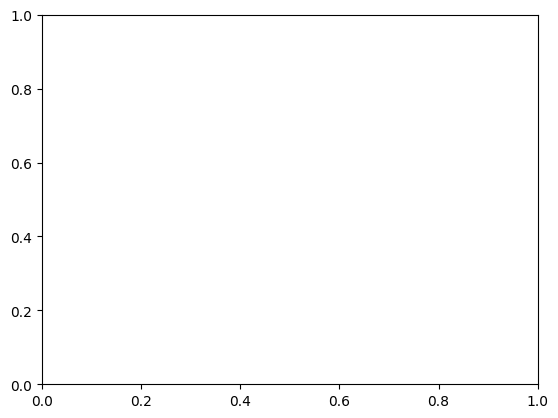

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.integrate import solve_ivp

# Define symbolic variables
t = sp.Symbol('t')
Gamma, R_op, B0, Brf, omega_rf, theta, S0 = sp.symbols('Gamma R_op B0 Brf omega_rf theta S0')
Sx, Sy, Sz = sp.Function('Sx')(t), sp.Function('Sy')(t), sp.Function('Sz')(t)

# Define system of ODEs
dSx_dt = (-Gamma - R_op) * Sx + (sp.cos(theta) * B0) * Sy - sp.sin(theta) * B0 * Sz + (Brf / 2) * Sy
dSy_dt = -(sp.cos(theta) * B0) * Sx + (-Gamma - R_op) * Sy - (Brf / 2) * Sx
dSz_dt = sp.sin(theta) * B0 * Sx + (-Gamma) * Sz + R_op * (S0 - Sz)

# Solve system symbolically
solutions = sp.dsolve([sp.Eq(Sx.diff(t), dSx_dt),
                        sp.Eq(Sy.diff(t), dSy_dt),
                        sp.Eq(Sz.diff(t), dSz_dt)])

# Compute derivative with respect to R_op
deriv_Sx_Rop = sp.diff(solutions[0].rhs, R_op)
deriv_Sy_Rop = sp.diff(solutions[1].rhs, R_op)
deriv_Sz_Rop = sp.diff(solutions[2].rhs, R_op)

# Convert symbolic solutions to numerical functions
Gamma_val = 100
R_op_val = 50
B0_val = 1e-3
Brf_val = 1e-4
omega_rf_val = 2 * np.pi * 10
theta_val = np.pi / 4
S0_val = 1

subs_dict = {Gamma: Gamma_val, R_op: R_op_val, B0: B0_val, Brf: Brf_val, 
             omega_rf: omega_rf_val, theta: theta_val, S0: S0_val}

num_Sx = sp.lambdify(t, solutions[0].rhs.subs(subs_dict), 'numpy')
num_Sy = sp.lambdify(t, solutions[1].rhs.subs(subs_dict), 'numpy')
num_Sz = sp.lambdify(t, solutions[2].rhs.subs(subs_dict), 'numpy')

# Time span
t_vals = np.linspace(0, 1, 1000)

# Evaluate solutions numerically
num_Sx_vals = num_Sx(t_vals)
num_Sy_vals = num_Sy(t_vals)
num_Sz_vals = num_Sz(t_vals)

# Plot results
plt.plot(t_vals, num_Sx_vals, label='Sx')
plt.plot(t_vals, num_Sy_vals, label='Sy')
plt.plot(t_vals, num_Sz_vals, label='Sz')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Spin Components')
plt.title('Time Evolution of Spin Components (RWA, Symbolic Solution)')
plt.show()

# Print derivative of symbolic solutions with respect to R_op
print("Derivative of Sx w.r.t R_op:", deriv_Sx_Rop)
print("Derivative of Sy w.r.t R_op:", deriv_Sy_Rop)
print("Derivative of Sz w.r.t R_op:", deriv_Sz_Rop)

# This one is the good one

In [ ]:
import sympy
from sympy import symbols, Eq, solve, I

def solve_system_symbolically():
    # Define parameters (symbolic). 
    # We allow them to be complex=True because of the i*w terms,
    # but you may restrict some to real if you prefer.
    w, gamma, B0 = symbols('w gamma B0', complex=True)
    delta, B1 = symbols('delta B1', complex=True)
    Sx_par = sympy.Symbol('Sx', complex=True)  # 'Sx' is treated as a parameter here
    Gamma_ = sympy.Symbol('Gamma', complex=True)
    R_op = sympy.Symbol('R_op', complex=True)
    S0 = sympy.Symbol('S0', complex=True)
    
    # Define the unknowns x, y, z (potentially complex)
    x, y, z = symbols('x y z', complex=True)
    
    # The system from the image, rewritten so that each equation = 0:
    #
    # 1) -i w x = - gamma * z * B0 - Gamma * x - R_op * x
    #    --> -i w x + gamma B0 z + (Gamma + R_op) x = 0
    eq1 = Eq(-I*w*x + gamma*B0*z + (Gamma_ + R_op)*x, 0)
    
    # 2) -i w y = - delta * B1 * Sx - Gamma * y - R_op * y
    #    --> -i w y + delta B1 Sx + (Gamma + R_op) y = 0
    eq2 = Eq(-I*w*y + gamma*B1*Sx_par + (Gamma_ + R_op)*y, 0)
    
    # 3) -i w z = gamma * B0 * x - Gamma * z + R_op (S0 - z)
    #    --> -i w z - gamma B0 x + (Gamma + R_op) z - R_op * S0 = 0
    eq3 = Eq(-I*w*z - gamma*B0*x + (Gamma_ + R_op)*z - R_op*S0, 0)
    
    # Solve for x, y, z symbolically
    sol = solve([eq1, eq2, eq3], [x, y, z], dict=True)
    
    # Print the solution(s)
    print("Solution(s) for x, y, z:")
    for i, s in enumerate(sol, 1):
        print(f"  Solution {i}:")
        print(f"    x = {s[x]}")
        print(f"    y = {s[y]}")
        print(f"    z = {s[z]}")

if __name__ == "__main__":
    solve_system_symbolically()


Solution(s) for x, y, z:
  Solution 1:
    x = B0*R_op*S0*gamma/(-B0**2*gamma**2 - Gamma**2 - 2*Gamma*R_op + 2*I*Gamma*w - R_op**2 + 2*I*R_op*w + w**2)
    y = -I*B1*Sx*delta/(I*Gamma + I*R_op + w)
    z = (-Gamma*R_op*S0 - R_op**2*S0 + I*R_op*S0*w)/(-B0**2*gamma**2 - Gamma**2 - 2*Gamma*R_op + 2*I*Gamma*w - R_op**2 + 2*I*R_op*w + w**2)


In [26]:
import numpy as np

# Define constants
gamma = 7e9
Gamma = 2000
R_op = 3e5
B0 = 100e-6
B1 = 1e-5
S0 = 1

# Frequency range
w = np.linspace(gamma * B0 - 1000, gamma * B0 + 1000, 1000)

# Time settings
t_span = [0, 1e-3]
sampling_rate = int(3 * gamma * B0)  # Adjusted for proper frequency resolution
t_eval = np.linspace(t_span[0], t_span[1], sampling_rate)

# Storage for Sx
Sx = []

# Compute Sx over time
for t in t_eval:
    Sx.append((R_op * S0 * gamma * B0) / ((gamma * B0) ** 2 - (Gamma + R_op) ** 2) * np.exp(1j * w * t))

# Convert to a NumPy array
Sx = np.array(Sx)




x = B0*R_op*S0*gamma/(-B0**2*gamma**2 - Gamma**2 - 2*Gamma*R_op + 2*I*Gamma*w - R_op**2 + 2*I*R_op*w + w**2)
y = -I*B1*Sx/(I*Gamma + I*R_op + w)
z = (-Gamma*R_op*S0 - R_op**2*S0 + I*R_op*S0*w)/(-B0**2*gamma**2 - Gamma**2 - 2*Gamma*R_op + 2*I*Gamma*w - R_op**2 + 2*I*R_op*w + w**2)

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 6))

axes[0].plot(np.abs(w), np.abs(z), color='blue', label='$\delta S_z$')
axes[0].set_title('$\delta S_z$')
axes[0].set_xlabel('w')
axes[0].set_ylabel('$\delta S_z$')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(t, np.abs(Sx), color='blue', label='$\delta S_y$')
axes[1].set_title('$\delta S_y$')
axes[1].set_xlabel('w')
axes[1].set_ylabel('$\delta S_y$')
axes[1].legend()
axes[1].grid(True)

axes[2].plot(np.abs(w), np.abs(x), color='blue', label='$\delta S_x$')
axes[2].set_title('$\delta S_x$')
axes[2].set_xlabel('w')
axes[2].set_ylabel('$\delta S_x$')
axes[2].legend()
axes[2].grid(True)

plt.tight_layout()

plt.show()

MemoryError: Unable to allocate 31.3 GiB for an array with shape (2100000, 1000) and data type complex128

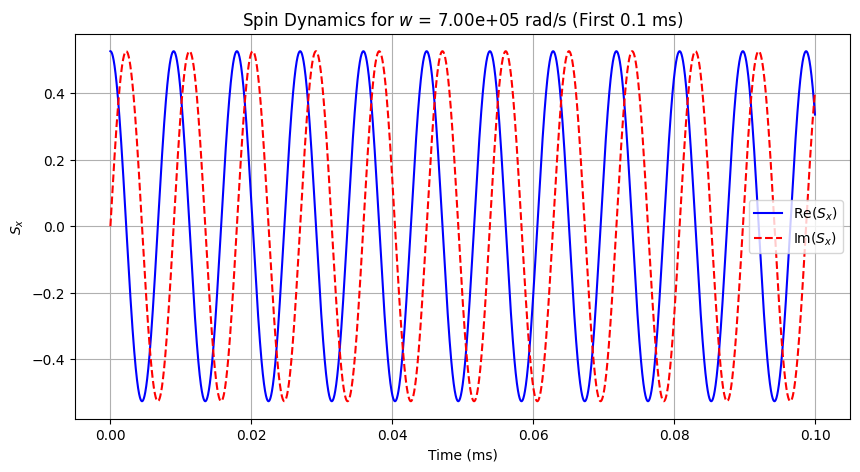

: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
gamma = 7e9
Gamma = 2000
R_op = 3e5
B0 = 100e-6
B1 = 1e-5
S0 = 1

# Frequency range
w = np.linspace(gamma * B0 - 1000, gamma * B0 + 1000, 1000)

# Time settings
t_span = [0, 1e-3]  # Full range (1 ms)
sampling_rate = int(1e5)  # Adjusted sampling rate
t_eval = np.linspace(t_span[0], t_span[1], sampling_rate)

# Compute Sx for ONE frequency at a time
denominator = (gamma * B0) ** 2 - (Gamma + R_op) ** 2
Sx_real = []
Sx_imag = []

index = 500  # Pick a specific frequency index to analyze

for t in t_eval:
    Sx_t = (R_op * S0 * gamma * B0 / denominator) * np.exp(1j * (gamma*B0 - w[index]) * t)
    Sx_real.append(Sx_t.real)
    Sx_imag.append(Sx_t.imag)

# Convert lists to NumPy arrays
Sx_real = np.array(Sx_real)
Sx_imag = np.array(Sx_imag)

# **Limit to the first 0.1 ms**
t_limit = 0.1e-3  # 0.1 ms
mask = t_eval <= t_limit  # Mask to select only the first 0.1 ms

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(t_eval[mask] * 1e3, Sx_real[mask], label=r"Re$(S_x)$", color="b")  # Convert time to ms
plt.plot(t_eval[mask] * 1e3, Sx_imag[mask], label=r"Im$(S_x)$", color="r", linestyle="dashed")

# Labels and legend
plt.xlabel("Time (ms)")
plt.ylabel(r"$S_x$")
plt.title(f"Spin Dynamics for $w$ = {w[index]:.2e} rad/s (First 0.1 ms)")
plt.legend()
plt.grid()
plt.show()


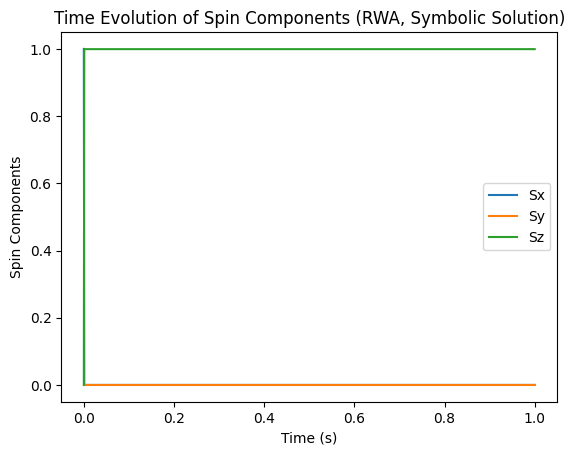

Derivative of Sx w.r.t R_op: -B0*R_op*S0*t*sqrt(-4*B0**2 - 4*B0*Brf*cos(theta) - Brf**2)*Piecewise((2*exp(t*(2*Gamma + 2*R_op - sqrt(-4*B0**2 - 4*B0*Brf*cos(theta) - Brf**2))/2)/(2*Gamma + 2*R_op - sqrt(-4*B0**2 - 4*B0*Brf*cos(theta) - Brf**2)), Ne(2*Gamma + 2*R_op - sqrt(-4*B0**2 - 4*B0*Brf*cos(theta) - Brf**2), 0)), (t, True))*exp(-t*(2*Gamma + 2*R_op - sqrt(-4*B0**2 - 4*B0*Brf*cos(theta) - Brf**2))/2)*sin(theta)/(4*B0**2*(sin(theta)**2 + cos(theta)**2) + 4*B0*Brf*cos(theta) + Brf**2) + B0*R_op*S0*t*sqrt(-4*B0**2 - 4*B0*Brf*cos(theta) - Brf**2)*Piecewise((2*exp(t*(2*Gamma + 2*R_op + sqrt(-4*B0**2 - 4*B0*Brf*cos(theta) - Brf**2))/2)/(2*Gamma + 2*R_op + sqrt(-4*B0**2 - 4*B0*Brf*cos(theta) - Brf**2)), Ne(2*Gamma + 2*R_op + sqrt(-4*B0**2 - 4*B0*Brf*cos(theta) - Brf**2), 0)), (t, True))*exp(-t*(2*Gamma + 2*R_op + sqrt(-4*B0**2 - 4*B0*Brf*cos(theta) - Brf**2))/2)*sin(theta)/(4*B0**2*(sin(theta)**2 + cos(theta)**2) + 4*B0*Brf*cos(theta) + Brf**2) + B0*R_op*S0*sqrt(-4*B0**2 - 4*B0*Brf*cos(th

: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Define symbolic variables
t = sp.Symbol('t')
Gamma, R_op, B0, Brf, omega_rf, theta, S0 = sp.symbols('Gamma R_op B0 Brf omega_rf theta S0')
Sx, Sy, Sz = sp.Function('Sx')(t), sp.Function('Sy')(t), sp.Function('Sz')(t)

# Define system of ODEs
dSx_dt = (-Gamma - R_op) * Sx + (sp.cos(theta) * B0) * Sy - sp.sin(theta) * B0 * Sz + (Brf / 2) * Sy
dSy_dt = -(sp.cos(theta) * B0) * Sx + (-Gamma - R_op) * Sy - (Brf / 2) * Sx
dSz_dt = sp.sin(theta) * B0 * Sx + (-Gamma) * Sz + R_op * (S0 - Sz)

# Provide initial conditions
ics = {Sx.subs(t, 0): 1, Sy.subs(t, 0): 0, Sz.subs(t, 0): 0}

# Solve system symbolically with initial conditions
solutions = sp.dsolve([sp.Eq(Sx.diff(t), dSx_dt),
                       sp.Eq(Sy.diff(t), dSy_dt),
                       sp.Eq(Sz.diff(t), dSz_dt)], ics=ics)

# Substitute numerical parameter values
Gamma_val = 2000
R_op_val = 3e6
B0_val = 100e-9
Brf_val = 1e-3
omega_rf_val = 7e-9*100e-9
theta_val = 45*np.pi/180
S0_val = 1

subs_dict = {Gamma: Gamma_val, R_op: R_op_val, B0: B0_val, Brf: Brf_val, 
             omega_rf: omega_rf_val, theta: theta_val, S0: S0_val}

# Convert symbolic solutions to numerical functions
num_Sx = sp.lambdify(t, solutions[0].rhs.subs(subs_dict), 'numpy')
num_Sy = sp.lambdify(t, solutions[1].rhs.subs(subs_dict), 'numpy')
num_Sz = sp.lambdify(t, solutions[2].rhs.subs(subs_dict), 'numpy')

# Time span
t_vals = np.linspace(0, 1, 1000)

# Evaluate solutions numerically
num_Sx_vals = num_Sx(t_vals)
num_Sy_vals = num_Sy(t_vals)
num_Sz_vals = num_Sz(t_vals)

# Plot results
plt.plot(t_vals, num_Sx_vals, label='Sx')
plt.plot(t_vals, num_Sy_vals, label='Sy')
plt.plot(t_vals, num_Sz_vals, label='Sz')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Spin Components')
plt.title('Time Evolution of Spin Components (RWA, Symbolic Solution)')
plt.show()

# Compute derivative with respect to R_op
deriv_Sx_Rop = sp.diff(solutions[0].rhs, R_op)
deriv_Sy_Rop = sp.diff(solutions[1].rhs, R_op)
deriv_Sz_Rop = sp.diff(solutions[2].rhs, R_op)

# Print derivative of symbolic solutions with respect to R_op
print("Derivative of Sx w.r.t R_op:", deriv_Sx_Rop)
print("Derivative of Sy w.r.t R_op:", deriv_Sy_Rop)
print("Derivative of Sz w.r.t R_op:", deriv_Sz_Rop)


In [ ]:
import sympy
from sympy import symbols, Function, Eq, dsolve

# 1. Define the independent variable (time) and parameters as Sympy symbols
t = symbols('t', real=True, positive=True)
gamma, B0, Gamma, R_op, S0 = symbols('gamma B0 Gamma R_op S0', real=True)

# 2. Define the unknown functions Sx(t), Sy(t), Sz(t)
Sx = Function('Sx')(t)
Sy = Function('Sy')(t)
Sz = Function('Sz')(t)

# 3. Write the system of ODEs as Sympy equations:
#    dSx/dt = - gamma*B0*Sy - Gamma*Sx + R_op*Sz
#    dSy/dt = - (Gamma + R_op)*Sy
#    dSz/dt = gamma*B0*Sx - Gamma*Sz + R_op*(S0 - Sz)

eq1 = Eq(Sx.diff(t), -gamma*B0*Sy - Gamma*Sx + R_op*Sx)
eq2 = Eq(Sy.diff(t), -(Gamma + R_op)*Sy)
eq3 = Eq(Sz.diff(t), gamma*B0*Sx - Gamma*Sz + R_op*(S0 - Sz))

# 4. Solve the system symbolically
solution = dsolve([eq1, eq2, eq3])

# 5. Print the solution
print(solution)


[Eq(Sx(t), B0*C2*gamma*exp(-t*(Gamma + R_op))/(2*R_op) + 2*C1*R_op*exp(-t*(Gamma - R_op))/(B0*gamma)), Eq(Sy(t), C2*exp(-t*(Gamma + R_op))), Eq(Sz(t), B0**2*C2*gamma**2*t*exp(-t*(Gamma + R_op))/(2*R_op) + B0**2*C3*gamma**2*exp(-t*(Gamma + R_op))/(2*R_op) + C1*exp(-t*(Gamma - R_op)) + R_op*S0*Piecewise((exp(t*(Gamma + R_op))/(Gamma + R_op), Ne(Gamma + R_op, 0)), (t, True))*exp(-t*(Gamma + R_op)))]


In [ ]:
# 1. Define the independent variable (time) and parameters as Sympy symbols
t = symbols('t', real=True, positive=True)
gamma, B0, Gamma, R_op, S0 = symbols('gamma B0 Gamma R_op S0', real=True)

# 2. Define the unknown functions Sx(t), Sy(t), Sz(t)
Sx = Function('Sx')(t)
Sy = Function('Sy')(t)
Sz = Function('Sz')(t)

# 3. Write the system of ODEs as Sympy equations:
#    dSx/dt = - gamma*B0*Sy - Gamma*Sx + R_op*Sz
#    dSy/dt = - (Gamma + R_op)*Sy
#    dSz/dt = gamma*B0*Sx - Gamma*Sz + R_op*(S0 - Sz)

eq11 = Eq(0, -gamma*B0*Sy - Gamma*Sx + R_op*Sx)
eq22 = Eq(0, -(Gamma + R_op)*Sy)
eq33 = Eq(0, gamma*B0*Sx - Gamma*Sz + R_op*(S0 - Sz))

# 4. Solve the system symbolically
solution2 = dsolve([eq11, eq22, eq33])

# 5. Print the solution
print(solution2)

ValueError: 
Number of equations and number of functions do not match

In [ ]:
import sympy
from sympy import symbols, Function, Eq, dsolve, latex

def solve_and_print_latex():
    # 1. Define the independent variable (time) and parameters as Sympy symbols
    t = symbols('t', real=True, positive=True)
    gamma, B0, Gamma, R_op, S0 = symbols('gamma B0 Gamma R_op S0', real=True)

    # 2. Define the unknown functions Sx(t), Sy(t), Sz(t)
    Sx = Function('Sx')(t)
    Sy = Function('Sy')(t)
    Sz = Function('Sz')(t)

    # 3. Write the system of ODEs as Sympy equations:
    #    dSx/dt = - gamma*B0*Sy - Gamma*Sx + R_op*Sz
    #    dSy/dt = - (Gamma + R_op)*Sy
    #    dSz/dt = gamma*B0*Sx - Gamma*Sz + R_op*(S0 - Sz)

    eq1 = Eq(Sx.diff(t), -gamma*B0*Sz - Gamma*Sx - R_op*Sx)
    eq2 = Eq(Sy.diff(t), -(Gamma + R_op)*Sy)
    eq3 = Eq(Sz.diff(t), gamma*B0*Sx - Gamma*Sz + R_op*(S0 - Sz))

    # 4. Solve the system symbolically
    solution = dsolve([eq1, eq2, eq3])

    # 5. Print the solution in LaTeX format
    #    We'll wrap each solution in an align environment
    print(r"\begin{align*}")
    for i, sol in enumerate(solution, 1):
        print(f"Solution {i}: & {latex(sol)} \\\\")
    print(r"\end{align*}")

if __name__ == "__main__":
    solve_and_print_latex()


\begin{align*}
Solution 1: & \operatorname{Sx}{\left(t \right)} = - C_{1} e^{- t \left(\Gamma + R_{op}\right)} \sin{\left(B_{0} \gamma t \right)} - C_{2} e^{- t \left(\Gamma + R_{op}\right)} \cos{\left(B_{0} \gamma t \right)} - R_{op} S_{0} \left(\begin{cases} t & \text{for}\: B_{0} = 0 \wedge \Gamma = - R_{op} \\\int e^{\Gamma t} e^{R_{op} t} \cosh{\left(t \left(\Gamma + R_{op}\right) \right)}\, dt & \text{for}\: B_{0} = - \frac{i \left(\Gamma + R_{op}\right)}{\gamma} \vee B_{0} = \frac{i \left(\Gamma + R_{op}\right)}{\gamma} \\\frac{B_{0} \gamma e^{\Gamma t} e^{R_{op} t} \sin{\left(B_{0} \gamma t \right)}}{B_{0}^{2} \gamma^{2} + \Gamma^{2} + 2 \Gamma R_{op} + R_{op}^{2}} + \frac{\Gamma e^{\Gamma t} e^{R_{op} t} \cos{\left(B_{0} \gamma t \right)}}{B_{0}^{2} \gamma^{2} + \Gamma^{2} + 2 \Gamma R_{op} + R_{op}^{2}} + \frac{R_{op} e^{\Gamma t} e^{R_{op} t} \cos{\left(B_{0} \gamma t \right)}}{B_{0}^{2} \gamma^{2} + \Gamma^{2} + 2 \Gamma R_{op} + R_{op}^{2}} & \text{otherwise} \end{cases}\r

\begin{align*}
Solution 1: & \operatorname{Sx}{\left(t \right)} = - C_{1} e^{- t \left(\Gamma + R_{op}\right)} \sin{\left(B_{0} \gamma t \right)} - C_{2} e^{- t \left(\Gamma + R_{op}\right)} \cos{\left(B_{0} \gamma t \right)} - R_{op} S_{0} \left(\begin{cases} t & \text{for}\: B_{0} = 0 \wedge \Gamma = - R_{op} \\\int e^{\Gamma t} e^{R_{op} t} \cosh{\left(t \left(\Gamma + R_{op}\right) \right)}\, dt & \text{for}\: B_{0} = - \frac{i \left(\Gamma + R_{op}\right)}{\gamma} \vee B_{0} = \frac{i \left(\Gamma + R_{op}\right)}{\gamma} \\\frac{B_{0} \gamma e^{\Gamma t} e^{R_{op} t} \sin{\left(B_{0} \gamma t \right)}}{B_{0}^{2} \gamma^{2} + \Gamma^{2} + 2 \Gamma R_{op} + R_{op}^{2}} + \frac{\Gamma e^{\Gamma t} e^{R_{op} t} \cos{\left(B_{0} \gamma t \right)}}{B_{0}^{2} \gamma^{2} + \Gamma^{2} + 2 \Gamma R_{op} + R_{op}^{2}} + \frac{R_{op} e^{\Gamma t} e^{R_{op} t} \cos{\left(B_{0} \gamma t \right)}}{B_{0}^{2} \gamma^{2} + \Gamma^{2} + 2 \Gamma R_{op} + R_{op}^{2}} & \text{otherwise} \end{cases}\right) e^{- t \left(\Gamma + R_{op}\right)} \sin{\left(B_{0} \gamma t \right)} + R_{op} S_{0} \left(\begin{cases} 0 & \text{for}\: B_{0} = 0 \wedge \Gamma = - R_{op} \\- i \int e^{\Gamma t} e^{R_{op} t} \sinh{\left(t \left(\Gamma + R_{op}\right) \right)}\, dt & \text{for}\: B_{0} = - \frac{i \left(\Gamma + R_{op}\right)}{\gamma} \\i \int e^{\Gamma t} e^{R_{op} t} \sinh{\left(t \left(\Gamma + R_{op}\right) \right)}\, dt & \text{for}\: B_{0} = \frac{i \left(\Gamma + R_{op}\right)}{\gamma} \\- \frac{B_{0} \gamma e^{\Gamma t} e^{R_{op} t} \cos{\left(B_{0} \gamma t \right)}}{B_{0}^{2} \gamma^{2} + \Gamma^{2} + 2 \Gamma R_{op} + R_{op}^{2}} + \frac{\Gamma e^{\Gamma t} e^{R_{op} t} \sin{\left(B_{0} \gamma t \right)}}{B_{0}^{2} \gamma^{2} + \Gamma^{2} + 2 \Gamma R_{op} + R_{op}^{2}} + \frac{R_{op} e^{\Gamma t} e^{R_{op} t} \sin{\left(B_{0} \gamma t \right)}}{B_{0}^{2} \gamma^{2} + \Gamma^{2} + 2 \Gamma R_{op} + R_{op}^{2}} & \text{otherwise} \end{cases}\right) e^{- t \left(\Gamma + R_{op}\right)} \cos{\left(B_{0} \gamma t \right)} \\
Solution 2: & \operatorname{Sy}{\left(t \right)} = C_{3} e^{- t \left(\Gamma + R_{op}\right)} \\
Solution 3: & \operatorname{Sz}{\left(t \right)} = C_{1} e^{- t \left(\Gamma + R_{op}\right)} \cos{\left(B_{0} \gamma t \right)} - C_{2} e^{- t \left(\Gamma + R_{op}\right)} \sin{\left(B_{0} \gamma t \right)} + R_{op} S_{0} \left(\begin{cases} t & \text{for}\: B_{0} = 0 \wedge \Gamma = - R_{op} \\\int e^{\Gamma t} e^{R_{op} t} \cosh{\left(t \left(\Gamma + R_{op}\right) \right)}\, dt & \text{for}\: B_{0} = - \frac{i \left(\Gamma + R_{op}\right)}{\gamma} \vee B_{0} = \frac{i \left(\Gamma + R_{op}\right)}{\gamma} \\\frac{B_{0} \gamma e^{\Gamma t} e^{R_{op} t} \sin{\left(B_{0} \gamma t \right)}}{B_{0}^{2} \gamma^{2} + \Gamma^{2} + 2 \Gamma R_{op} + R_{op}^{2}} + \frac{\Gamma e^{\Gamma t} e^{R_{op} t} \cos{\left(B_{0} \gamma t \right)}}{B_{0}^{2} \gamma^{2} + \Gamma^{2} + 2 \Gamma R_{op} + R_{op}^{2}} + \frac{R_{op} e^{\Gamma t} e^{R_{op} t} \cos{\left(B_{0} \gamma t \right)}}{B_{0}^{2} \gamma^{2} + \Gamma^{2} + 2 \Gamma R_{op} + R_{op}^{2}} & \text{otherwise} \end{cases}\right) e^{- t \left(\Gamma + R_{op}\right)} \cos{\left(B_{0} \gamma t \right)} + R_{op} S_{0} \left(\begin{cases} 0 & \text{for}\: B_{0} = 0 \wedge \Gamma = - R_{op} \\- i \int e^{\Gamma t} e^{R_{op} t} \sinh{\left(t \left(\Gamma + R_{op}\right) \right)}\, dt & \text{for}\: B_{0} = - \frac{i \left(\Gamma + R_{op}\right)}{\gamma} \\i \int e^{\Gamma t} e^{R_{op} t} \sinh{\left(t \left(\Gamma + R_{op}\right) \right)}\, dt & \text{for}\: B_{0} = \frac{i \left(\Gamma + R_{op}\right)}{\gamma} \\- \frac{B_{0} \gamma e^{\Gamma t} e^{R_{op} t} \cos{\left(B_{0} \gamma t \right)}}{B_{0}^{2} \gamma^{2} + \Gamma^{2} + 2 \Gamma R_{op} + R_{op}^{2}} + \frac{\Gamma e^{\Gamma t} e^{R_{op} t} \sin{\left(B_{0} \gamma t \right)}}{B_{0}^{2} \gamma^{2} + \Gamma^{2} + 2 \Gamma R_{op} + R_{op}^{2}} + \frac{R_{op} e^{\Gamma t} e^{R_{op} t} \sin{\left(B_{0} \gamma t \right)}}{B_{0}^{2} \gamma^{2} + \Gamma^{2} + 2 \Gamma R_{op} + R_{op}^{2}} & \text{otherwise} \end{cases}\right) e^{- t \left(\Gamma + R_{op}\right)} \sin{\left(B_{0} \gamma t \right)} \\
\end{align*}

In [ ]:
import sympy
from sympy import symbols, Eq, solve, latex

def solve_steady_state_and_print_latex():
    # 1. Define parameters as Sympy symbols
    gamma, B0, Gamma, R_op, S0 = symbols('gamma B0 Gamma R_op S0', real=True)
    
    # 2. Define the unknowns (steady-state values) as symbols (not functions of t)
    Sx, Sy, Sz = symbols('Sx Sy Sz', real=True)
    
    # 3. Write the system of steady-state equations (dS/dt = 0):
    #    0 = - gamma*B0*Sy - Gamma*Sx + R_op*Sz
    #    0 = -(Gamma + R_op)*Sy
    #    0 = gamma*B0*Sx - Gamma*Sz + R_op*(S0 - Sz)
    
    eq1 = Eq(-gamma*B0*Sy - Gamma*Sx + R_op*Sx, 0)
    eq2 = Eq(-(Gamma + R_op)*Sy, 0)
    eq3 = Eq(gamma*B0*Sx - Gamma*Sz + R_op*(S0 - Sz), 0)
    
    # 4. Solve the system symbolically for (Sx, Sy, Sz)
    #    'dict=True' returns a list of solution dictionaries
    solutions = solve([eq1, eq2, eq3], [Sx, Sy, Sz], dict=True)
    
    # 5. Print the solution(s) in LaTeX format
    #    Typically there will be only one physical solution, but we iterate in case of multiple.
    print(r"\begin{align*}")
    for i, sol in enumerate(solutions, 1):
        print(f"\textbf{{Solution {i}:}}\\")
        for var in [Sx, Sy, Sz]:
            print(f"{latex(var)} &= {latex(sol[var])} \\\\")
        print(r"\end{align*}")
        if i < len(solutions):
            print(r"\begin{align*}")

if __name__ == "__main__":
    solve_steady_state_and_print_latex()


\begin{align*}
	extbf{Solution 1:}\
Sx &= 0 \\
Sy &= 0 \\
Sz &= \frac{R_{op} S_{0}}{\Gamma + R_{op}} \\
\end{align*}


\begin{align*}
	extbf{Solution 1:}\
Sx &= 0 \\
Sy &= 0 \\
Sz &= \frac{R_{op} S_{0}}{\Gamma + R_{op}} \\
\end{align*}